In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial import ConvexHull

# Define the number of leaders and followers
num_leaders = 3
num_followers = 6
num_agents = num_leaders + num_followers

# Define the communication topology for followers
follower_topology =  {0: [1, 3], 1: [0, 2], 2: [1], 3: [0, 4], 4: [3, 5], 5: [4]}

# Define the communication topology for leaders
leader_topology = {0: [0], 1: [1], 2: [2], 3: [], 4: [], 5: []}

# Create the communication topology matrix
communication_topology = np.zeros((num_followers, num_followers))
for i in range(num_followers):
    neighbors = follower_topology[i]
    for neighbor in neighbors:
        communication_topology[i, neighbor] = 1

# Compute the Laplacian matrix
degree_matrix = np.diag(np.sum(communication_topology, axis=1))
laplacian_matrix = degree_matrix - communication_topology

print("Communication Topology Matrix:")
print(communication_topology)

print("\nLaplacian Matrix:")
print(laplacian_matrix)

# Create A0
A0 = np.zeros((num_followers, num_followers))
for i in range(num_followers):
    leaders = leader_topology[i]
    A0[i, i] = len(leaders)

print("\nA0:")
print(A0)

L1=laplacian_matrix+A0
print("\nL1:")
print(L1)

# Create L2
L2 = np.zeros((num_followers, num_leaders))
for i in range(num_followers):
    leaders = leader_topology[i]
    for leader in leaders:
        L2[i, leader] = -1

print("\nL2:")
print(L2)


Communication Topology Matrix:
[[0. 1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]

Laplacian Matrix:
[[ 2. -1.  0. -1.  0.  0.]
 [-1.  2. -1.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.]
 [-1.  0.  0.  2. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0. -1.  1.]]

A0:
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

L1:
[[ 3. -1.  0. -1.  0.  0.]
 [-1.  3. -1.  0.  0.  0.]
 [ 0. -1.  2.  0.  0.  0.]
 [-1.  0.  0.  2. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0. -1.  1.]]

L2:
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [2]:
# Define the maximum movement distance per iteration for followers
max_movement_followers = 0.1

# Define the number of iterations
num_iterations = 100

# Initialize leader positions randomly in the range [0, 10)
leader_positions = 10 * np.random.rand(num_leaders, 2)

# Initialize follower positions randomly in the range [0, 10)
follower_positions = 10 * np.random.rand(num_followers, 2)
print(follower_positions)
print(leader_positions)



[[3.53350539 8.84851271]
 [6.92638983 0.03589628]
 [7.81431705 3.99203738]
 [5.6412532  2.32364103]
 [0.71868571 7.02213321]
 [6.70702724 7.94617322]]
[[1.03799376 3.49816395]
 [4.77425745 5.9147769 ]
 [4.29978902 2.9566888 ]]


In [3]:
from scipy.integrate import solve_ivp

def matrix_differential_equation(tt, X):
    X = X.reshape([num_followers, 2])
    cols=np.shape(X)[1]
    # print(cols)
    dX_dt = np.zeros((num_followers, cols))
    for i in range(cols):
        dX_dt[:,i] = - np.dot(L1,X[:,i]) - np.dot(L2,leader_positions[:,i])
    # print(dX_dt)
    dX_dt = dX_dt.reshape([1,num_followers*2])
    return dX_dt


t_sum=15 # 秒
t_span = (0, t_sum)  # 时间范围
t = np.linspace(0, t_sum, num_iterations)  # 用于绘制的时间点

# 微分方程的初值
X=follower_positions.reshape([1,num_followers*2])
print(X)

initial_condition = X[0]  # 初始条件
print(initial_condition)
solution = solve_ivp(matrix_differential_equation, t_span, initial_condition, dense_output=True)

Y = solution.sol(t)
print(len(t))
Y[:,1].reshape([num_followers, 2])

[[3.53350539 8.84851271 6.92638983 0.03589628 7.81431705 3.99203738
  5.6412532  2.32364103 0.71868571 7.02213321 6.70702724 7.94617322]]
[3.53350539 8.84851271 6.92638983 0.03589628 7.81431705 3.99203738
 5.6412532  2.32364103 0.71868571 7.02213321 6.70702724 7.94617322]
100


array([[3.80195751, 6.56786271],
       [6.33851285, 2.10595191],
       [7.196296  , 3.4957232 ],
       [4.84085406, 3.58712845],
       [2.03081716, 6.6128608 ],
       [5.96690217, 7.7835067 ]])

In [3]:
# Visualization setup
%matplotlib widget  
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
leader_scatter = ax.scatter(leader_positions[:, 0], leader_positions[:, 1], c='r', marker='o', label='Leaders')
follower_scatter = ax.scatter(follower_positions[:, 0], follower_positions[:, 1], c='b', marker='o', label='Followers')
hull_line, = ax.plot([], [], c='r', linewidth=2)

leader_labels = []
follower_labels = []
for i in range(num_leaders):
    leader_labels.append(ax.text(leader_positions[i, 0], leader_positions[i, 1], f"Leader {i+1}", ha='center', va='center', color='r', fontsize=8, fontweight='bold'))
for i in range(num_followers):
    follower_labels.append(ax.text(follower_positions[i, 0], follower_positions[i, 1], f"Follower {i+1}", ha='center', va='center', color='b', fontsize=8, fontweight='bold'))

ax.legend(loc='upper right')

for k in range(num_followers):
    x=[]
    y=[]
    for i in range(num_iterations):
        x.append(Y[:,i].reshape([num_followers, 2])[k,0])
        y.append(Y[:,i].reshape([num_followers, 2])[k,1]) 
    plt.plot(x, y)
# Show the plot
plt.grid(True)
plt.show()

# Function to update the plot in each animation frame
def update(frame):
    follower_positions=Y[:,frame].reshape([num_followers, 2])

    leader_scatter.set_offsets(leader_positions)
    follower_scatter.set_offsets(follower_positions)

    # Update labels
    for i in range(num_leaders):
        leader_labels[i].set_position((leader_positions[i, 0] + 0.8, leader_positions[i, 1] + 0.1))
    for i in range(num_followers):
        follower_labels[i].set_position((follower_positions[i, 0] + 0.8, follower_positions[i, 1] + 0.1))

    # Calculate the convex hull for leaders only
    hull = ConvexHull(leader_positions)
    hull_vertices = np.append(hull.vertices, hull.vertices[0])  # Closing the hull by connecting the first vertex again
    hull_line.set_xdata(leader_positions[hull_vertices, 0])
    hull_line.set_ydata(leader_positions[hull_vertices, 1])

    return leader_scatter, follower_scatter, hull_line, *leader_labels, *follower_labels

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_iterations, interval=200, blit=True)

# Save the animation as a gif
ani.save('multi_agent_containment.gif', writer='pillow')


Agent 1: [0.6347192  0.39062939]
Agent 2: [0.6347192  0.39062939]
Agent 3: [0.6347192  0.39062939]
Agent 4: [0.6347192  0.39062939]
Agent 5: [0.6347192  0.39062939]
Agent 6: [0.6347192  0.39062939]


In [5]:
for k in range(num_followers):
    x=[]
    y=[]
    for i in range(num_iterations):
        x.append(Y[:,i].reshape([num_followers, 2])[k,0])
        y.append(Y[:,i].reshape([num_followers, 2])[k,1]) 
        plt.plot(x, y)
# Show the plot
plt.grid(True)
plt.show()

[<__main__.Agent object at 0x000001CACA544730>, <__main__.Agent object at 0x000001CACA544850>]
[<__main__.Agent object at 0x000001CACA5444C0>, <__main__.Agent object at 0x000001CACA5447F0>]
[<__main__.Agent object at 0x000001CACA5444C0>, <__main__.Agent object at 0x000001CACA5448B0>]
[<__main__.Agent object at 0x000001CACA544850>, <__main__.Agent object at 0x000001CACA544910>]
Agent 1: [0.65054743 0.73767805]
Agent 2: [0.65015054 0.73561571]
Agent 3: [0.64999888 0.73482797]
Agent 4: [0.65103774 0.74022727]
Agent 5: [0.65143418 0.74228964]
Agent 6: [0.65158555 0.7430774 ]


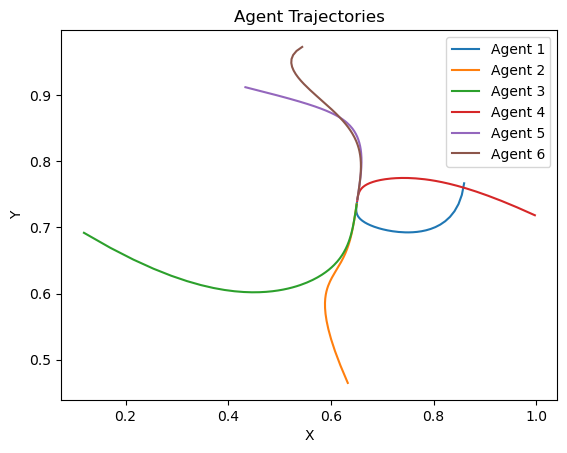

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class Agent:
    def __init__(self, position):
        self.position = np.array(position)
        self.velocity = np.zeros(2)  # 初始化速度为零
        self.neighbors = []

    def move(self):
        # 根据当前速度更新位置
        self.position += self.velocity

    def update_neighbor_positions(self):
        # 更新邻居的位置信息
        neighbor_positions = [neighbor.position for neighbor in self.neighbors]
        self.target_position = np.mean(neighbor_positions, axis=0)

class Controller:
    def __init__(self, agents):
        self.agents = agents

    def update(self):
        # 先更新每个智能体的邻居位置信息
        for agent in self.agents:
            agent.update_neighbor_positions()

        # 计算每个智能体的速度，使其朝目标位置移动
        for agent in self.agents:
            direction = agent.target_position - agent.position
            agent.velocity = direction * 0.1  # 控制速度增益，可以调整这个值来控制收敛速度

def main():
    # 初始化智能体
    num_agents = 6
    agents = [Agent([np.random.rand(), np.random.rand()]) for _ in range(num_agents)]

    # 定义拓扑结构
    topology = {0: [1, 3], 1: [0, 2], 2: [1], 3: [0, 4], 4: [3, 5], 5: [4]}
    for i in range(num_agents):
        neighbors = [agents[j] for j in topology[i]]
        agents[i].neighbors = neighbors
        print(agents[i].neighbors)

    # 创建控制器
    controller = Controller(agents)

    # 模拟移动过程，并记录每个智能体的位置
    num_iterations = 200
    agent_positions = [[] for _ in range(num_agents)]
    for _ in range(num_iterations):
        controller.update()
        for i, agent in enumerate(agents):
            agent_positions[i].append(agent.position.copy())  # 记录当前位置的副本，以防位置被后续修改

        for agent in agents:
            agent.move()

    # 打印最终的智能体位置
    for i, agent in enumerate(agents):
        print(f"Agent {i+1}: {agent.position}")

    # 绘制智能体的运动轨迹
    for i in range(num_agents):
        positions = np.array(agent_positions[i])
        plt.plot(positions[:, 0], positions[:, 1], label=f"Agent {i+1}")

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Agent Trajectories')
    plt.show()

if __name__ == "__main__":
    main()


Agent 0: [0.63236349 0.55695082]
Agent 1: [0.63236349 0.55695082]
Agent 2: [0.63236348 0.55695082]
Agent 3: [0.63236348 0.55695082]
Agent 4: [0.63236349 0.55695082]
Agent 5: [0.63236349 0.55695082]


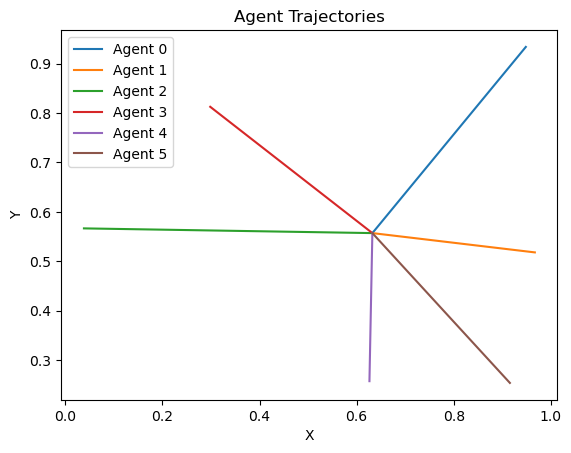

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class Agent:
    def __init__(self, agent_id, position, neighbors):
        self.agent_id = agent_id
        self.position = np.array(position)
        self.velocity = np.zeros(2)  # 初始化速度为零
        self.neighbors = neighbors

    def move(self):
        # 根据当前速度更新位置
        self.position += self.velocity

class Controller:
    def __init__(self, agents):
        self.agents = agents
        self.num_agents = len(agents)
        self.target_position = np.mean([agent.position for agent in agents], axis=0)

    def update_velocities(self):
        # 计算每个智能体的速度，使其朝目标位置移动
        for agent in self.agents:
            direction = self.target_position - agent.position
            agent.velocity = direction * 0.1  # 控制速度增益，可以调整这个值来控制收敛速度

    def update_positions(self):
        # 更新每个智能体的位置
        for agent in self.agents:
            agent.move()

def main():
    # 定义邻居拓扑结构
    topology = {0: [1, 3], 1: [0, 2], 2: [1], 3: [0, 4], 4: [3, 5], 5: [4]}

    # 初始化智能体
    num_agents = len(topology)
    agents = [Agent(i, [np.random.rand(), np.random.rand()], topology[i]) for i in range(num_agents)]

    # 创建控制器
    controller = Controller(agents)

    # 模拟移动过程，并记录每个智能体的位置
    num_iterations = 200
    agent_positions = [[] for _ in range(num_agents)]
    for _ in range(num_iterations):
        controller.update_velocities()
        for i, agent in enumerate(agents):
            agent_positions[i].append(agent.position.copy())  # 记录当前位置的副本，以防位置被后续修改
        controller.update_positions()

    # 打印最终的智能体位置
    for agent in agents:
        print(f"Agent {agent.agent_id}: {agent.position}")

    # 绘制智能体的运动轨迹
    for i in range(num_agents):
        positions = np.array(agent_positions[i])
        plt.plot(positions[:, 0], positions[:, 1], label=f"Agent {i}")

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Agent Trajectories')
    plt.show()

if __name__ == "__main__":
    main()
